In [ ]:
pip install networkx

In [ ]:
import pandas as pd
import numpy as np
import networkx as nx
import random
import matplotlib.pyplot as plt

In [ ]:
#edges = np.loadtxt('edge_list.txt', dtype=int)

In [ ]:
edge_df = pd.read_csv("edge_list.txt", sep=" ", header=None)
edge_df.columns = ["Edge_1", "Edge_2"]
edge_df.head()

,Edge_1,Edge_2
0,236,186
1,236,84
2,236,62
3,236,142
4,236,252


### Add edges to graph G

In [ ]:
edges = list(zip(edge_df['Edge_1'].tolist(), edge_df['Edge_2'].tolist()))
edges[:6]

[(236, 186), (236, 84), (236, 62), (236, 142), (236, 252), (236, 169)]

In [ ]:
g = nx.Graph()
g.add_edges_from(edges)

### Add nodes to graph G

In [ ]:
nodes = list(set(list(edge_df['Edge_1'].unique()) + list(edge_df['Edge_2'].unique())))
print(nodes[:10])

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [ ]:
g.add_nodes_from(nodes)

### Extract gigantic connected component

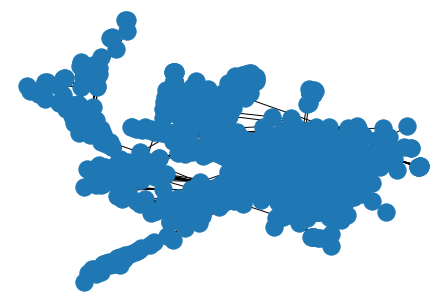

In [ ]:
nodeList = sorted(nx.connected_components(g), key=len, reverse=True)[0]
G = g.subgraph(nodeList).copy()
nx.draw(G)

In [ ]:
connected_comp_nodes = G.nodes
connected_comp_nodes

NodeView((236, 186, 84, 62, 142, 252, 169, 280, 257, 297, 303, 105, 276, 272, 88, 271, 13, 69, 133, 30, 121, 21, 26, 304, 122, 224, 314, 315, 213, 67, 318, 322, 141, 25, 1, 200, 248, 341, 109, 55, 199, 223, 178, 345, 9, 277, 325, 59, 123, 203, 45, 104, 285, 170, 128, 221, 239, 188, 323, 222, 56, 98, 331, 113, 5, 274, 284, 3, 119, 136, 31, 156, 261, 332, 342, 161, 344, 235, 176, 251, 66, 232, 281, 103, 146, 246, 60, 208, 313, 164, 117, 185, 196, 211, 10, 24, 346, 302, 53, 80, 187, 249, 299, 92, 266, 180, 194, 94, 101, 57, 242, 184, 204, 320, 127, 300, 130, 254, 330, 82, 79, 172, 85, 40, 298, 265, 118, 268, 290, 148, 291, 48, 238, 212, 72, 63, 168, 158, 324, 308, 334, 75, 134, 7, 347, 258, 231, 295, 329, 73, 191, 269, 150, 197, 54, 106, 16, 27, 202, 340, 87, 96, 338, 250, 29, 65, 38, 77, 339, 153, 39, 159, 108, 288, 51, 237, 83, 183, 234, 207, 126, 260, 317, 283, 228, 124, 175, 46, 278, 263, 19, 143, 321, 99, 23, 68, 177, 86, 296, 225, 102, 227, 132, 135, 36, 139, 309, 165, 116, 230, 61,

In [ ]:
highest_degrees = sorted(nx.eigenvector_centrality(G).items(), key=lambda x:x[1], reverse=True)

In [ ]:
highest_degrees_betweeness = highest_degrees.copy()

### Calculate centralities to find hubs



In [ ]:
def centralities(G):
    """
    Calculate degree, closeness, betweenness centralities of the graph
    
    :param G: Moscow undeground graph
    :return: mapping of centrality names (degree, closeness, betweenness) to np.array of its values
    """
    return {
        "degree": np.array(list(nx.degree_centrality(G).values())),
        "closeness": np.array(list(nx.closeness_centrality(G).values())),
        "betweenness": np.array(list(nx.betweenness_centrality(G).values()))
    }

In [ ]:
'''Check some random values of centralities'''
c = centralities(G)

In [ ]:
def top10_centralities(G):
    """
    Create table of top 10 nodes by degree, closeness, betweenness centralities
    
    :param G: graph of Moscow undeground
    :return: mapping of station name to the dataframe with columns (station, line, centrality)
    """
    r = {}
    for n, f in zip(["degree", "closeness", "betweenness"],[nx.degree_centrality, nx.closeness_centrality, nx.betweenness_centrality]):
        sort = sorted(list(f(G).items()), key=lambda x:x[1], reverse=True)
        ids, centrality = zip(*sort)
        #station_names = [nx.get_node_attributes(G, 'station_name')[y] for y in ids]
        #line_names = [nx.get_node_attributes(G, 'line_name')[y] for y in ids]
        r[n] = pd.DataFrame({"Node": ids, "centrality": centrality})
    return r

In [ ]:
'''Check that some random nodes are in the top 10 tables'''
top_dfs = top10_centralities(G)

In [ ]:
cases = [['degree', 5000, 0, 'Degree centrality'], 
         ['closeness', 700, 0, 'Closeness centrality'], 
         ['betweenness', 900, 20, 'Betweenness centrality']]
for c_key, scale, bias, title in cases:
    print(title)
    display(top_dfs[c_key])

Degree centrality


,Node,centrality
0,2543,0.078531
1,2347,0.077727
2,1888,0.067810
3,1800,0.065398
4,1663,0.062718
...,...,...
3727,4006,0.000268
3728,4034,0.000268
3729,3983,0.000268
3730,4036,0.000268


Closeness centrality


,Node,centrality
0,1835,0.282011
1,1718,0.281925
2,1376,0.280294
3,1173,0.280231
4,1509,0.278912
...,...,...
3727,110,0.098298
3728,201,0.098295
3729,154,0.098122
3730,255,0.089539


Betweenness centrality


,Node,centrality
0,1085,0.201112
1,1718,0.175053
2,1577,0.101692
3,1405,0.088753
4,136,0.086337
...,...,...
3727,4033,0.000000
3728,3983,0.000000
3729,3992,0.000000
3730,4036,0.000000


In [ ]:
top_dfs['betweenness']

,Node,centrality
0,1085,0.201112
1,1718,0.175053
2,1577,0.101692
3,1405,0.088753
4,136,0.086337
...,...,...
3727,4033,0.000000
3728,3983,0.000000
3729,3992,0.000000
3730,4036,0.000000


In [ ]:
top_dfs['betweenness'].to_csv('Majidd.csv')

### Calculate degrees and find those with lower dagree (Like lover than 10)

In [ ]:
degree_dict = G.degree
degree_dict

DegreeView({236: 36, 186: 43, 84: 12, 62: 25, 142: 42, 252: 64, 169: 37, 280: 42, 257: 17, 297: 24, 303: 20, 105: 13, 276: 17, 272: 44, 88: 19, 271: 72, 13: 30, 69: 9, 133: 17, 30: 16, 121: 11, 21: 64, 26: 67, 304: 54, 122: 62, 224: 27, 314: 12, 315: 55, 213: 38, 67: 75, 318: 10, 322: 71, 141: 27, 25: 68, 1: 16, 200: 56, 248: 20, 341: 11, 109: 36, 55: 16, 199: 46, 223: 26, 178: 12, 345: 15, 9: 56, 277: 64, 325: 38, 59: 18, 123: 17, 203: 56, 45: 11, 104: 31, 285: 46, 170: 45, 128: 27, 221: 7, 239: 58, 188: 47, 323: 38, 222: 10, 56: 77, 98: 48, 331: 19, 113: 39, 5: 12, 274: 13, 284: 15, 3: 16, 119: 61, 136: 131, 31: 22, 156: 11, 261: 37, 332: 42, 342: 33, 161: 24, 344: 8, 235: 4, 176: 13, 251: 13, 66: 14, 232: 24, 281: 15, 103: 15, 146: 9, 246: 13, 60: 7, 208: 6, 313: 36, 164: 2, 117: 5, 185: 25, 196: 12, 211: 29, 10: 9, 24: 15, 346: 26, 302: 19, 53: 30, 80: 22, 187: 15, 249: 23, 299: 19, 92: 20, 266: 17, 180: 19, 194: 18, 94: 21, 101: 18, 57: 14, 242: 23, 184: 17, 204: 21, 320: 20, 127:

In [ ]:
for key, val in degree_dict:
  if val < 3:
    print(key)

164
191
153
183
234
207
228
321
61
240
267
155
294
76
336
305
71
255
241
301
904
2740
2704
279
70
97
253
286
81
293
112
138
316
205
52
216
34
2814
35
47
247
160
182
157
154
1326
1253
1071
1276
1262
1760
1693
1034
1967
1755
1362
1233
1690
1176
1546
1430
667
1394
1353
1395
1558
656
1046
1586
1252
1208
1854
1065
1270
1027
1627
899
1224
448
571
383
443
468
454
499
386
379
411
356
401
377
648
660
2722
3006
2798
2714
2952
2998
3413
3282
2808
3125
2860
3375
3134
3408
2857
2975
2922
2788
2481
2442
2380
2541
2382
2178
2168
2595
2483
3928
3689
3744
3691
3717
3560
3467
3732
3688
3699
3854
3879
3955
3808
3589
3811
3597
3733
3704
3942
3582
3801
3885
3807
3816
3959
3575
3875
3922
4032
4006
4034
3991
4005
4033
3983
3992
4036
4028


Calculate PageRank

In [ ]:
def top10_pagerank(G, alpha):
    top10_centralities_dict = {}      
    top10_deg_page = sorted(list(nx.pagerank(G, alpha).items()), key=lambda x:x[1], reverse=True)[:10]
    ids, centrality = zip(*top10_deg_page)
    top10_centralities_dict = pd.DataFrame({'id': ids,'centrality': centrality})
    return top10_centralities_dict

display(top10_pagerank(G, 0.85))

,id,centrality
0,3830,0.001427
1,483,0.001426
2,2313,0.001017
3,376,0.000982
4,2047,0.000969
5,25,0.000882
6,428,0.000877
7,56,0.000854
8,563,0.000847
9,475,0.000846


In [ ]:
n1 = [3112, 3057, 3669, 2805]
m1 = {2: 7, 3: 10, 4: 12, 5: 16, 6: 24, 7: 31, 8: 39, 9: 44, 10: 55, 11: 70, 12: 97, 13: 119, 14: 148, 15: 179, 16: 210, 17: 256, 18: 291, 19: 312, 20: 329, 21: 346, 22: 403, 23: 497, 24: 621, 25: 700, 26: 701, 27: 702, 28: 702, 29: 702, 30: 702, 31: 702, 32: 702, 33: 702, 34: 702, 35: 702, 36: 702, 37: 702, 38: 702, 39: 702}

n2 = [3541, 3057, 535]
m2 = {2: 4, 3: 5, 4: 6, 5: 8, 6: 10, 7: 11, 8: 13, 9: 15, 10: 20, 11: 30, 12: 40, 13: 57, 14: 84, 15: 117, 16: 153, 17: 194, 18: 239, 19: 280, 20: 299, 21: 314, 22: 329, 23: 346, 24: 403, 25: 496, 26: 617, 27: 700, 28: 702, 29: 703, 30: 703, 31: 703, 32: 703, 33: 703, 34: 703, 35: 703, 36: 703, 37: 703, 38: 703, 39: 703}

n3 = [3057, 3713]
m3 = {2: 3, 3: 4, 4: 5, 5: 7, 6: 9, 7: 10, 8: 12, 9: 14, 10: 19, 11: 29, 12: 39, 13: 56, 14: 83, 15: 116, 16: 152, 17: 193, 18: 238, 19: 279, 20: 298, 21: 313, 22: 328, 23: 345, 24: 402, 25: 495, 26: 616, 27: 699, 28: 701, 29: 702, 30: 702, 31: 702, 32: 702, 33: 702, 34: 702, 35: 702, 36: 702, 37: 702, 38: 702, 39: 702}

n4 = [2406, 3057]
m4 ={2: 4, 3: 5, 4: 6, 5: 8, 6: 10, 7: 11, 8: 13, 9: 15, 10: 20, 11: 30, 12: 40, 13: 57, 14: 84, 15: 117, 16: 153, 17: 194, 18: 239, 19: 280, 20: 299, 21: 314, 22: 329, 23: 346, 24: 403, 25: 496, 26: 617, 27: 700, 28: 702, 29: 703, 30: 703, 31: 703, 32: 703, 33: 703, 34: 703, 35: 703, 36: 703, 37: 703, 38: 703, 39: 703} 

In [ ]:
affected1 = list(m1.values())
affected2 = list(m2.values())
affected3 = list(m3.values())
affected4 = list(m4.values())

for i in affected2:
  affected1.append(i)

for i in affected3:
  affected1.append(i)

for i in affected4:
  affected1.append(i)

In [ ]:
affected1 = set(affected1)

In [ ]:
affected1

{3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 19,
 20,
 24,
 29,
 30,
 31,
 39,
 40,
 44,
 55,
 56,
 57,
 70,
 83,
 84,
 97,
 116,
 117,
 119,
 148,
 152,
 153,
 179,
 193,
 194,
 210,
 238,
 239,
 256,
 279,
 280,
 291,
 298,
 299,
 312,
 313,
 314,
 328,
 329,
 345,
 346,
 402,
 403,
 495,
 496,
 497,
 616,
 617,
 621,
 699,
 700,
 701,
 702,
 703}

In [ ]:
nodes

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 13,
 14,
 16,
 17,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 38,
 39,
 40,
 41,
 42,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 108,
 109,
 110,
 111,
 112,
 113,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185,
 186,
 187,
 188,
 189,
 190,
 191,
 192,
 19

In [ ]:
newNodes_WOAffected = [i for i in nodes if i not in affected1]

In [ ]:
print(len(nodes))
print(len(affected1))
print(len(newNodes_WOAffected))

3953
68
3889


In [ ]:
print(random.choice(newNodes_WOAffected))
print(random.choice(newNodes_WOAffected))

1714
3546
